In [9]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Loading the data
data = pd.read_csv("emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


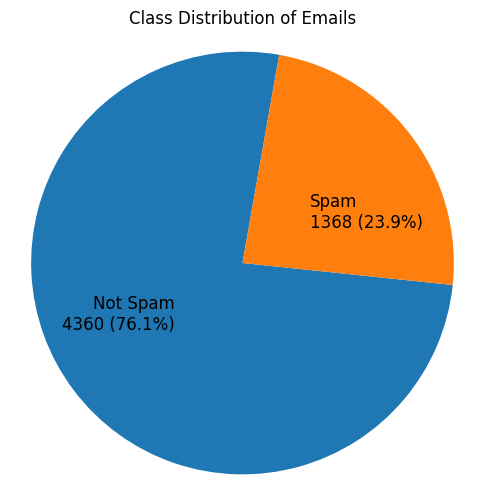

In [12]:
# Seeing the data distribution

# Calculate counts of each class
class_counts = data['spam'].value_counts().rename({1: 'Spam', 0: 'Not Spam'})

# Plotting the pie chart
plt.figure(figsize=(6, 6))
labels = [f'{class_counts.index[i]}\n{class_counts.iloc[i]} ({class_counts.iloc[i]/len(data)*100:.1f}%)' for i in range(len(class_counts))]
plt.pie(class_counts, labels=labels, startangle=80, labeldistance=0.4, textprops={'fontsize': 12})
plt.title('Class Distribution of Emails')
plt.axis('equal')

# Show the plot
plt.show()

#### 1. Removing the phrase 'Subject: '

In [13]:
# Define a function to remove "Subject :" prefix
def remove_subject_prefix(subject):
    return subject.replace('Subject: ', '')

# Apply the function to the 'text' column
data['text'] = data['text'].apply(remove_subject_prefix)

In [14]:
# Review the data
data.head()

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1


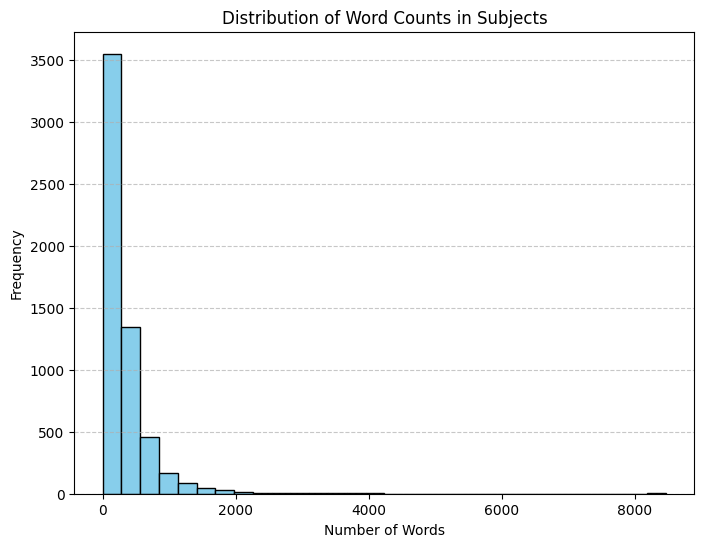

In [15]:
# Looking at the volume of the data we have in terms of the word counts
word_counts = data['text'].apply(lambda x: len(x.split()))
# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Subjects')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2. Removing punctuation, numbers, emails, URLs, special characters and converting to lowercase

In [16]:
# Function to preprocess text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove emails
    text = re.sub(r'\S*@\S*\s?', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    return text.strip()

data['text'] = data['text'].apply(preprocess_text)

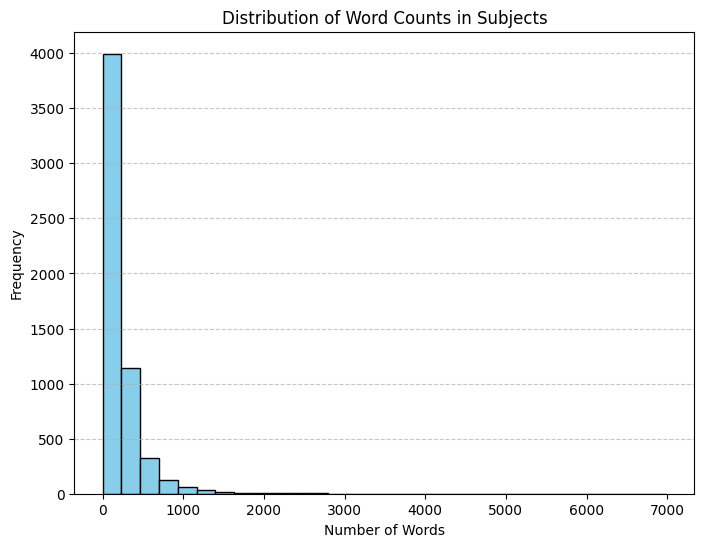

In [17]:
# Looking at the volume of the data we have in terms of the word counts after first preprocessing round
word_counts = data['text'].apply(lambda x: len(x.split()))

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Subjects')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 3. Further preprocessing

In [18]:
# Tokenization
data['text'] = data['text'].apply(word_tokenize)

# Stopword Removal
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Normalization
data['text'] = data['text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

In [19]:
# Joining the list of words to sentence
data['text'] = data['text'].apply(lambda x:' '.join(x))

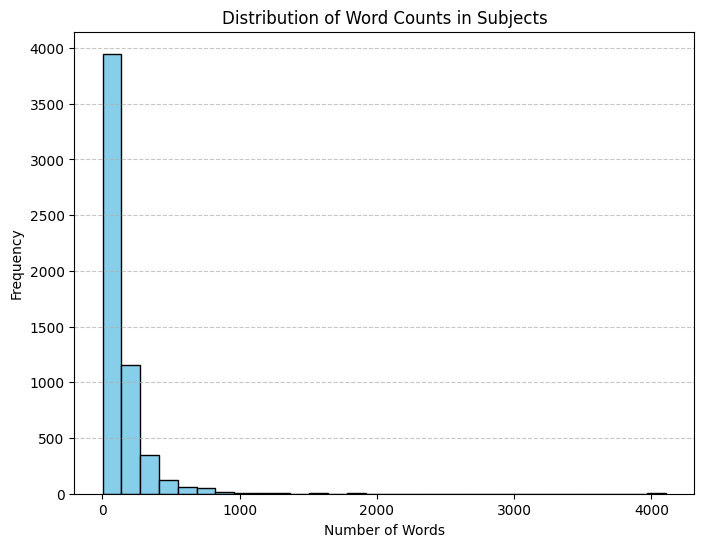

In [20]:
# Looking at the volume of the data we have in terms of the word counts after second preprocessing round
word_counts = data['text'].apply(lambda x: len(x.split()))

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Subjects')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
X,Y = data['text'], data['spam']

# We will set stratify=Y so that we can sample the train, validation and test sets in accordance to the original dataset's distribution
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, shuffle=True, test_size=0.2, random_state=42, stratify=Y)
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, shuffle=True, test_size=0.25, random_state=42, stratify=train_Y)

In [22]:
train_data = pd.concat([train_X, train_Y], axis=1)
train_data.to_csv('train.csv', index=False)

test_data = pd.concat([test_X, test_Y], axis=1)
test_data.to_csv('test.csv', index=False)

val_data = pd.concat([val_X, val_Y], axis=1)
val_data.to_csv('validation.csv', index=False)